In [ ]:
import torch

In [ ]:
import tensorflow as tf


The provided code pertains to the task of image classification using a Convolutional Neural Network (CNN) on the EuroSAT_RGB dataset. Here's a summary of the code:

1) Importing Libraries: Essential libraries such as PyTorch, TensorFlow, and torchvision are imported. A git repository 'STA380' is cloned for dataset retrieval.

2) Data Preprocessing:

    1) Image transformations are set, which include resizing to 32x32 pixels, horizontal flipping for augmentation, conversion to tensor format, and normalization.
    2) The EuroSAT_RGB dataset is loaded with the aforementioned transformations.
    3) The dataset is split into 80% training data and 20% testing data.

3) Data Visualization: A function (imshow) is created to display a sample of images. A batch of training images is visualized using this function.

4) Neural Network Design:

    1) A simple CNN model named Net is defined with two convolutional layers followed by two fully connected layers. Dropout layers are also integrated for regularization.
    2) The model is moved to a GPU if available, and the loss function (cross entropy) and optimizer (Adam) are defined.

5) Training:

    1) The model is trained for 10 epochs. For each epoch, forward and backward passes are carried out. The model's predictions on test data are visualized every 200 batches.
    2) The training loss and accuracy are displayed at the end of each epoch.

6) Evaluation:

    1) After training, the model's accuracy is assessed on the test dataset.
    2) A confusion matrix is generated and displayed using seaborn to evaluate the model's performance across classes.

Overall, the script establishes an end-to-end pipeline for training a CNN on the EuroSAT_RGB dataset, from data loading and preprocessing to training and evaluation.

In [5]:
!git clone https://github.com/jgscott/STA380.git

Cloning into 'STA380'...
remote: Enumerating objects: 35426, done.
remote: Counting objects: 100% (8401/8401), done.
remote: Compressing objects: 100% (7057/7057), done.
remote: Total 35426 (delta 1259), reused 8348 (delta 1239), pack-reused 27025
Receiving objects: 100% (35426/35426), 346.18 MiB | 17.91 MiB/s, done.
Resolving deltas: 100% (1262/1262), done.
Updating files: 100% (35749/35749), done.


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import tqdm
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

In [18]:
# Data preprocessing and augmentation
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to a common size
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

In [19]:
# Load dataset
dataset = ImageFolder('STA380/data/EuroSAT_RGB', transform=transform)

In [20]:
# Split dataset into train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [21]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=64,
                                         shuffle=False, num_workers=2)

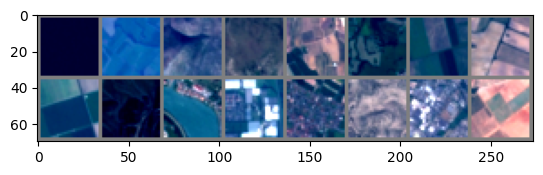

Labels: 9 5 2 2 6 5 0 0 0 2 8 4 7 2 4 6


In [22]:
# Function to display a sample of images
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training images and display them
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:16]))
print('Labels:', ' '.join('%d' % labels[j] for j in range(16)))

In [27]:
# Let's define a simple CNN

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)  # in_channels, out_channels, kernel_size, stride
        self.conv2 = nn.Conv2d(32, 100, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)  # Each channel gets zeroed out independently on each forward call with probability p
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(19600, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 100, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=19600, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [28]:
# Set the device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


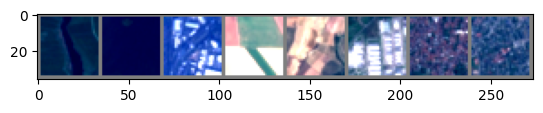

Predicted: 1 5 7 1 6 4 5 6


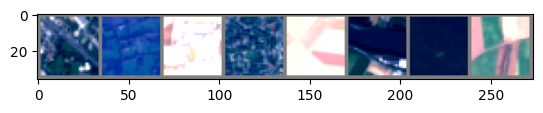

Predicted: 7 4 4 7 0 8 1 0
Epoch 1, Loss: 1.4772, Accuracy: 46.14%


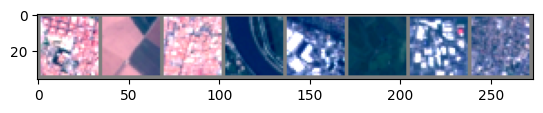

Predicted: 6 0 7 8 4 5 4 7


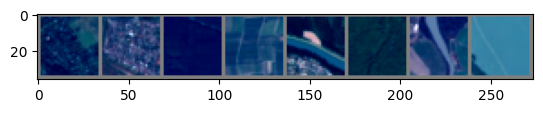

Predicted: 8 7 9 8 3 5 8 9
Epoch 2, Loss: 1.0338, Accuracy: 63.41%


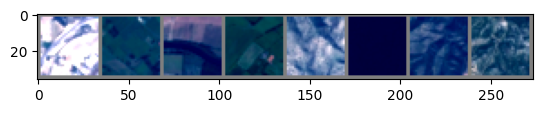

Predicted: 4 5 8 2 7 9 7 3


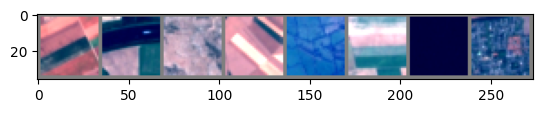

Predicted: 0 8 6 0 5 0 9 7
Epoch 3, Loss: 0.9151, Accuracy: 67.98%


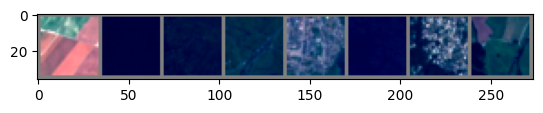

Predicted: 0 9 1 1 7 1 7 8


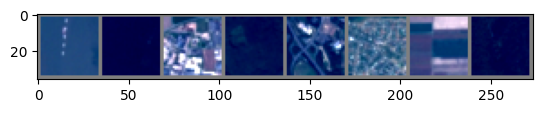

Predicted: 2 1 4 1 7 7 0 1
Epoch 4, Loss: 0.8185, Accuracy: 71.15%


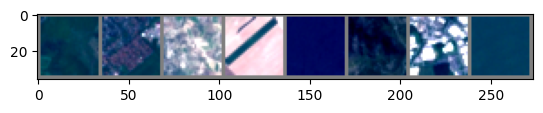

Predicted: 5 7 6 0 9 2 4 9


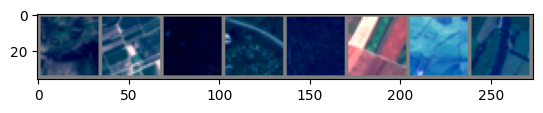

Predicted: 2 6 1 5 1 0 9 8
Epoch 5, Loss: 0.7726, Accuracy: 73.41%


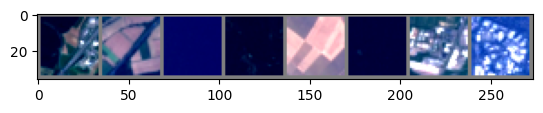

Predicted: 3 0 9 1 0 1 4 4


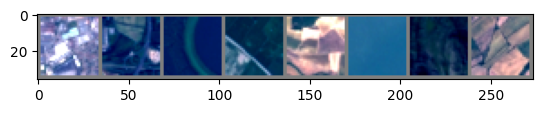

Predicted: 4 3 8 8 6 9 2 6
Epoch 6, Loss: 0.7324, Accuracy: 74.75%


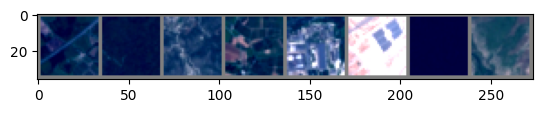

Predicted: 3 1 7 6 4 7 9 6


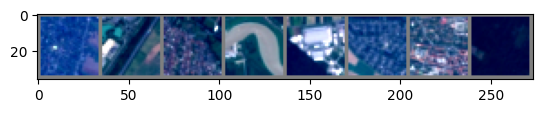

Predicted: 7 3 7 8 4 7 7 1
Epoch 7, Loss: 0.6836, Accuracy: 76.75%


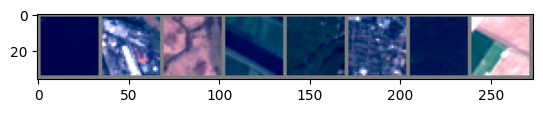

Predicted: 9 4 0 5 5 7 9 0


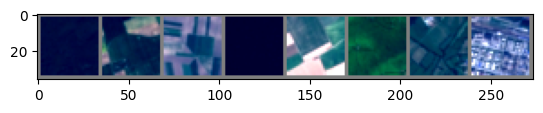

Predicted: 1 0 3 9 0 1 3 4
Epoch 8, Loss: 0.6568, Accuracy: 77.94%


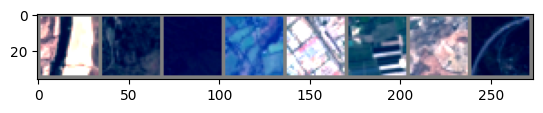

Predicted: 8 2 9 8 4 6 7 3


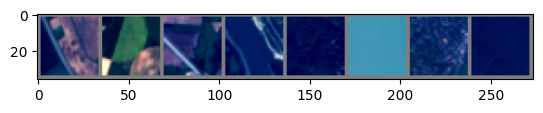

Predicted: 3 0 3 8 1 9 7 9
Epoch 9, Loss: 0.6248, Accuracy: 78.78%


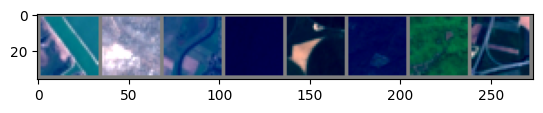

Predicted: 3 2 8 9 8 1 5 8


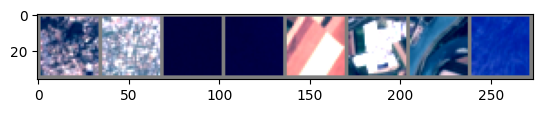

Predicted: 7 7 9 9 0 4 8 2
Epoch 10, Loss: 0.5887, Accuracy: 80.32%
Finished Training


In [29]:
# Number of training epochs
num_epochs = 10
testiter = iter(testloader)

# Main training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total =0
    correct=0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)


        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and optimize
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        #Images with predicted class on test data

        if i % 200 == 0:
            with torch.no_grad():
                # Show a sample of images from the test data and model's predictions
                test_images, test_labels = next(testiter)
                test_images, test_labels = test_images.to(device), test_labels.to(device)

                imshow(torchvision.utils.make_grid(test_images[:8].cpu()))
                test_outputs = net(test_images[:8])
                _, predicted = torch.max(test_outputs, 1)
                print('Predicted:', ' '.join('%d' % predicted[j] for j in range(8)))
    # Print average loss for the epoch
    accuracy = 100 * correct / total
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(trainloader):.4f}, Accuracy: {accuracy:.2f}%')

print('Finished Training')


In [30]:
#Accuracy on Test data
correct = 0
total = 0

# Disable gradient calculation during inference
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test dataset: {accuracy:.2f}%')

Accuracy on the test dataset: 77.02%


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


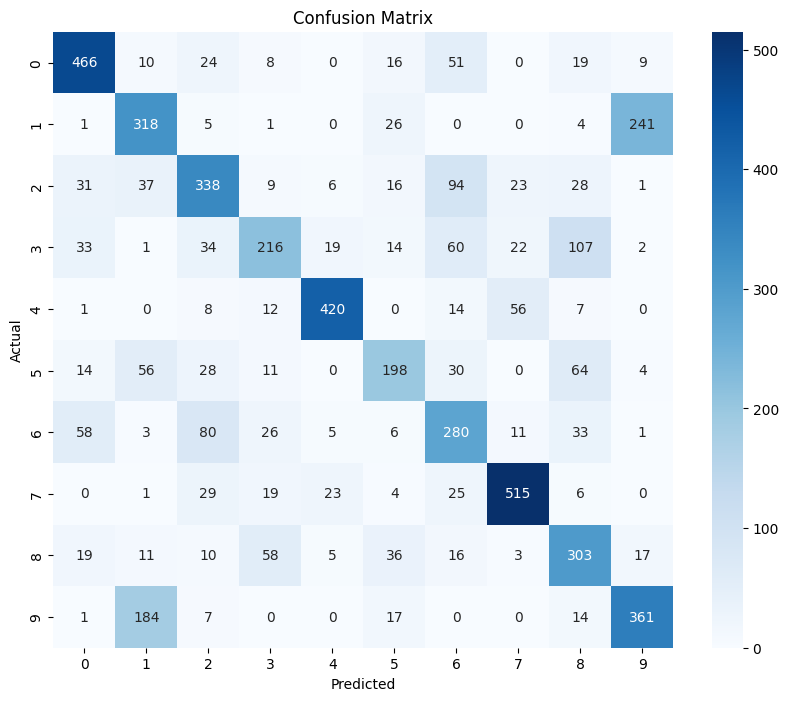

In [17]:
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns

with torch.no_grad():
    all_predictions = []
    all_labels = []
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
# conf_matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1,
#                               display_labels=clf.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()